In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
from scipy import interpolate


In [3]:
aoa_evol = [(0, 1, 2, 3, 3, 11, 13, 15, 12, 12, 9, 7, 5, 5, 4, 3, 7, 9, 11, 13, 15, 16),
            (7, 9, 11, 11, 11, 9, 12, 18, 19, 19, 15, 13, 10, 8, 5, 5, 3, 3, 3, 3),
            (0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 4, 4, 5, 7, 9, 13, 16, 18, 16, 12, 0),
            (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 12, 11, 11, 11, 10, 9, 9, 11, 14, 10, 6, 4, 4)]

vel_evol = [(9, 9, 9, 9, 13, 13, 13, 13, 13, 15, 15, 15, 15, 11, 11, 11, 11, 11, 11, 11, 11, 11),
            (13, 13, 13, 12, 11, 9, 9, 9, 9, 13, 13, 13, 13, 13, 13, 15, 16, 18, 11, 7),
            (10, 12, 14, 16, 18, 20, 22, 22, 24, 20, 17, 15, 14, 14, 14, 14, 14, 14, 11, 11, 11),
            (16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 14, 12, 12, 12, 18, 18, 18, 18, 18, 18, 10)]

line_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
dot_colors = ['blue', 'orangered', 'green', 'crimson']

In [4]:
def export_plot(filenamebase, export_area_drawing = True, export_latex = True):

  plt.savefig("{}_l.pdf".format(filenamebase))

  if export_latex:
    ead = ''
    if export_area_drawing:
      ead = '--export-area-drawing'

    el = '--export-latex'
    plt.savefig("{}.svg".format(filenamebase))
    cmd = ''' env -u LD_LIBRARY_PATH inkscape -T -f {0}.svg \
              --export-background-opacity=0 \
              {1} {2} --export-pdf={0}.pdf'''.format(filenamebase, ead, el)
    os.system(cmd)
    os.system('rm {}.svg'.format(filenamebase))

/var/folders/xn/6htkyn1918s2p78bt7v282d00000gn/T/ipykernel_23610/3814965213.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
env: inkscape: No such file or directory


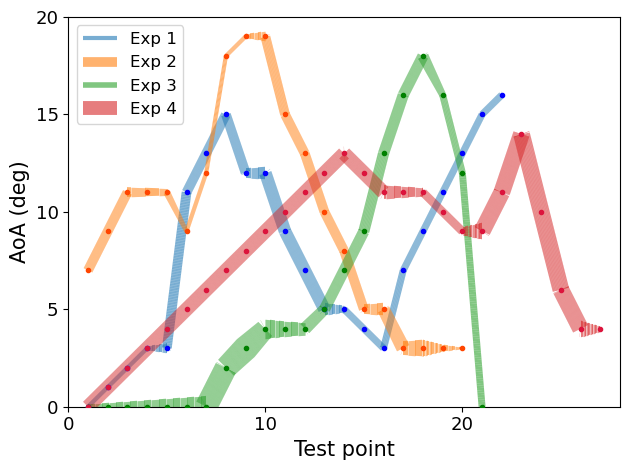

In [64]:
fig, ax = plt.subplots()
for exp_cnt in range(len(aoa_evol)):
  aoa_exp = aoa_evol[exp_cnt]
  vel_exp = vel_evol[exp_cnt]
  x_axis = np.arange(1, len(aoa_exp)+1)

  x_new = np.linspace(1, len(aoa_exp)+1, len(aoa_exp)*100)

  
  # aoa_new = np.interp(x_new, x_axis, aoa_exp)
  # vel_new = np.interp(x_new, x_axis, vel_exp)-6
  
  # aoa_bspline = interpolate.make_interp_spline(x_axis, aoa_exp, k=2)
  # vel_bspline = interpolate.make_interp_spline(x_axis, vel_exp, k=2)
  aoa_bspline = interpolate.make_smoothing_spline(x_axis, aoa_exp, lam=0.015)
  vel_bspline = interpolate.make_smoothing_spline(x_axis, vel_exp)
  aoa_new = aoa_bspline(x_new)
  vel_new = vel_bspline(x_new)-6

  points = np.array([x_new, aoa_new]).T.reshape(-1,1,2)
  segments = np.concatenate([points[:-1], points[1:]], axis=1) #shape:(len(aoa_evol[i])-1, 2, 2)
  lc = LineCollection(segments[0:-99], color=line_colors[exp_cnt], alpha=0.6, label=f"Exp {exp_cnt+1}", linewidths=vel_new)
  
  ax.add_collection(lc)
  ax.plot(x_axis, aoa_exp, ".", color=dot_colors[exp_cnt], zorder=100)
  
ax.set_xlim(0, 28)
ax.set_ylim(0, 20)
ax.legend(loc='upper left', fontsize="12")
  
ax.tick_params(axis="both", which="major", labelsize=13)
plt.locator_params(axis='both', nbins=5)
plt.xlabel("Test point", fontsize=15)
plt.ylabel("AoA (deg)", fontsize=15)

plt.tight_layout()

fig.show()
export_plot("dyn_segments_temp")


In [54]:
segments.shape

(2199, 2, 2)

In [55]:
x_axis[-1]

22

In [57]:
x_new.shape

(2200,)

In [89]:
vel_new-7

array([6.        , 5.99896527, 5.99795145, ..., 1.28629243, 1.32600064,
       1.366246  ])